import libraries

In [1]:
import numpy as np
import pandas as pd

import dataset

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


checking state's value count

In [3]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

one hot encoding the state column to make the categorical values into 0 and 1

In [4]:
df=pd.get_dummies(df)

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [6]:
import seaborn as sb

correlation between the columns 

In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [8]:
import matplotlib.pyplot as plt

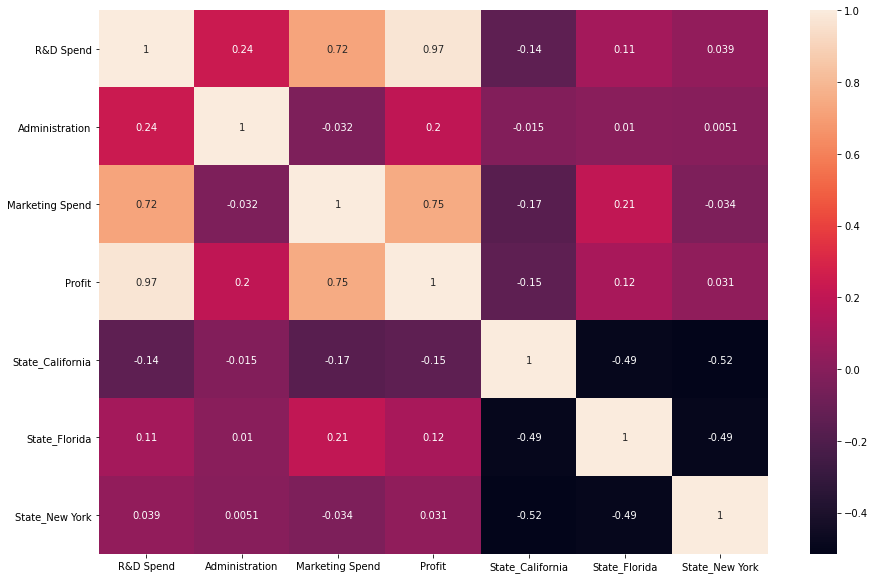

In [9]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(),annot=True)

keeping the profit column seperately from the dataframe to train the model

In [10]:
y=df['Profit']
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

dropping the profit column from the dataframe

In [11]:
df.drop(['Profit'],axis=1,inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


importing sckit-learn library

In [12]:
from sklearn.model_selection import train_test_split

splitting the model for training and testing

In [13]:
X_train, X_test, y_train, y_test=train_test_split(df,y,test_size=0.15,shuffle=True,random_state=1)

importing Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr_model=LinearRegression()

fit() method will fit the model to the input training instances 

In [16]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

predict() will perform predictions on the testing instances, based on the learned parameters during fit 

In [17]:
preds=lr_model.predict(X_test)

In [18]:
preds

array([113248.24540489,  89966.71877212,  74898.54188776,  69291.69560257,
       179927.95380501, 171698.20694887,  49806.21830342, 102275.46926672])

checking if the y_test has got the accurate result after training and testing the model

In [19]:
y_test.values

array([105008.31,  96479.51,  78239.91,  81229.06, 191050.39, 182901.99,
        35673.41, 101004.64])

In [21]:
nums=[i for i in range(1,9)]

plotting the graph between x_test(predicted output) and y_test

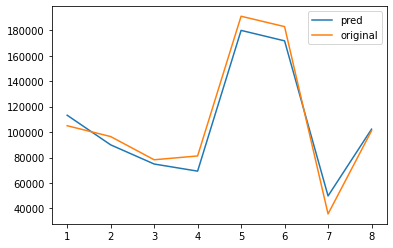

In [22]:
plt.plot(nums,preds,label='pred')
plt.plot(nums,y_test,label='original')
plt.legend()
plt.show()

checking the mean square error between the expected output vs the predicted output

In [23]:
sum((preds-y_test.values)**2)/8

89320376.72600093

checking the mean absolute error

In [24]:
sum(abs(preds-y_test.values))/8

8470.164494838593